In [166]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR


from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,auc

from tensorflow.keras.utils import to_categorical
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")
#Toplantıya katıldım ve youtubedeki webinarlara katılabildim ancak Bayramdan ve üniversite sınavlarına çalışmaktan proje yapmaktan çok vakit bulamadım ama webinardan öğrendiğim bilgiler
#dahilinde ve kendi bildiği kadarıyla kendimce bir şeyler uğraştım olmuştur veya olmamıştır eksik bilgiler vardır ama ben bu süreçte kendime ne kattığıma baktığımdan dolayı her öğrendiğim bilgi benim için nimettir.
#Program için teşekkür ediyorum.
#Neredeyse tüm regresyonlar modeller oluşturuldu veri işleme yapıldı veri görselleştirme yapıldı Standardizasyon Normalizasyon işlemleri yapıldı Korelasyonlar karmaşıklık matrisleri oluşturuldu
#MERİÇ ŞİMŞEK mericsimsek344@gmail.com

In [104]:
dia=pd.read_csv("diabetes.csv")
df=dia.copy()
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.isnull().values.any() #hiç eksik değer var mı  (hayır çıktı) evet çıksaydı ona göre davranışla yaklaşacaktık ortalama ile doldurma veya 0 ile doldurma gibi...

False

In [ ]:
df[["Insulin","Age"]].corr() #İnsulin ile yaş arasındaki ilişki yani korelasyonu gösterir.


Insulin       Age
Insulin  1.000000 -0.042163
Age     -0.042163  1.000000

In [ ]:
corr=df.corr()

<Axes: >

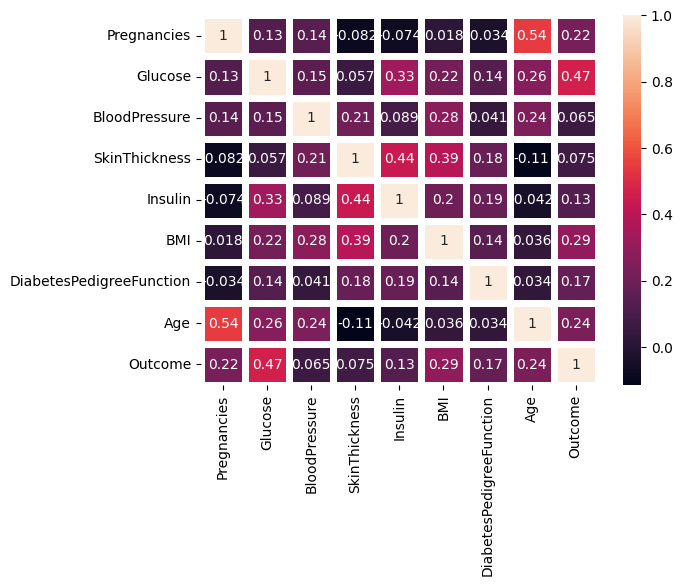

In [ ]:
sns.heatmap(corr,annot=True,linewidths=5)

<Axes: xlabel='Insulin', ylabel='Age'>

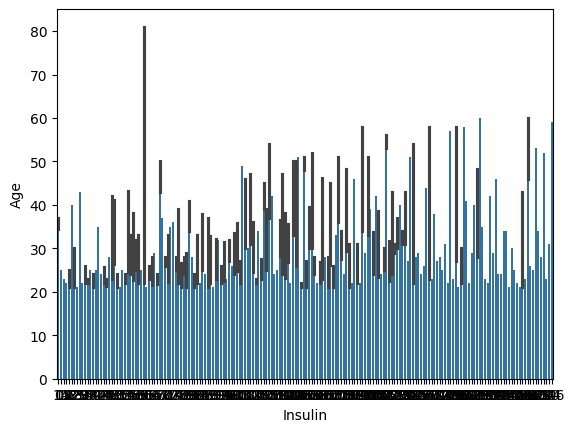

In [ ]:
sns.barplot(x="Insulin",y="Age",data=df)

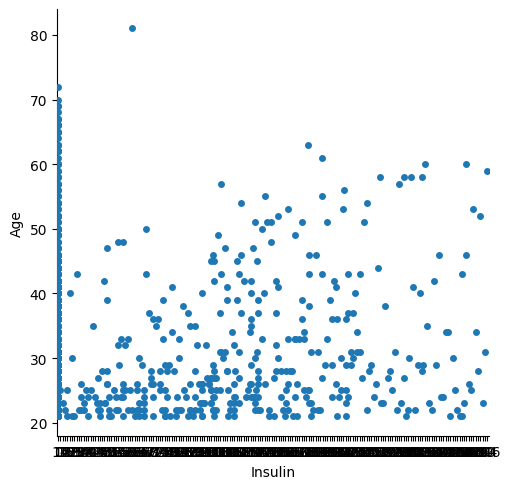

In [ ]:
sns.catplot(x="Insulin",y="Age",data=df)

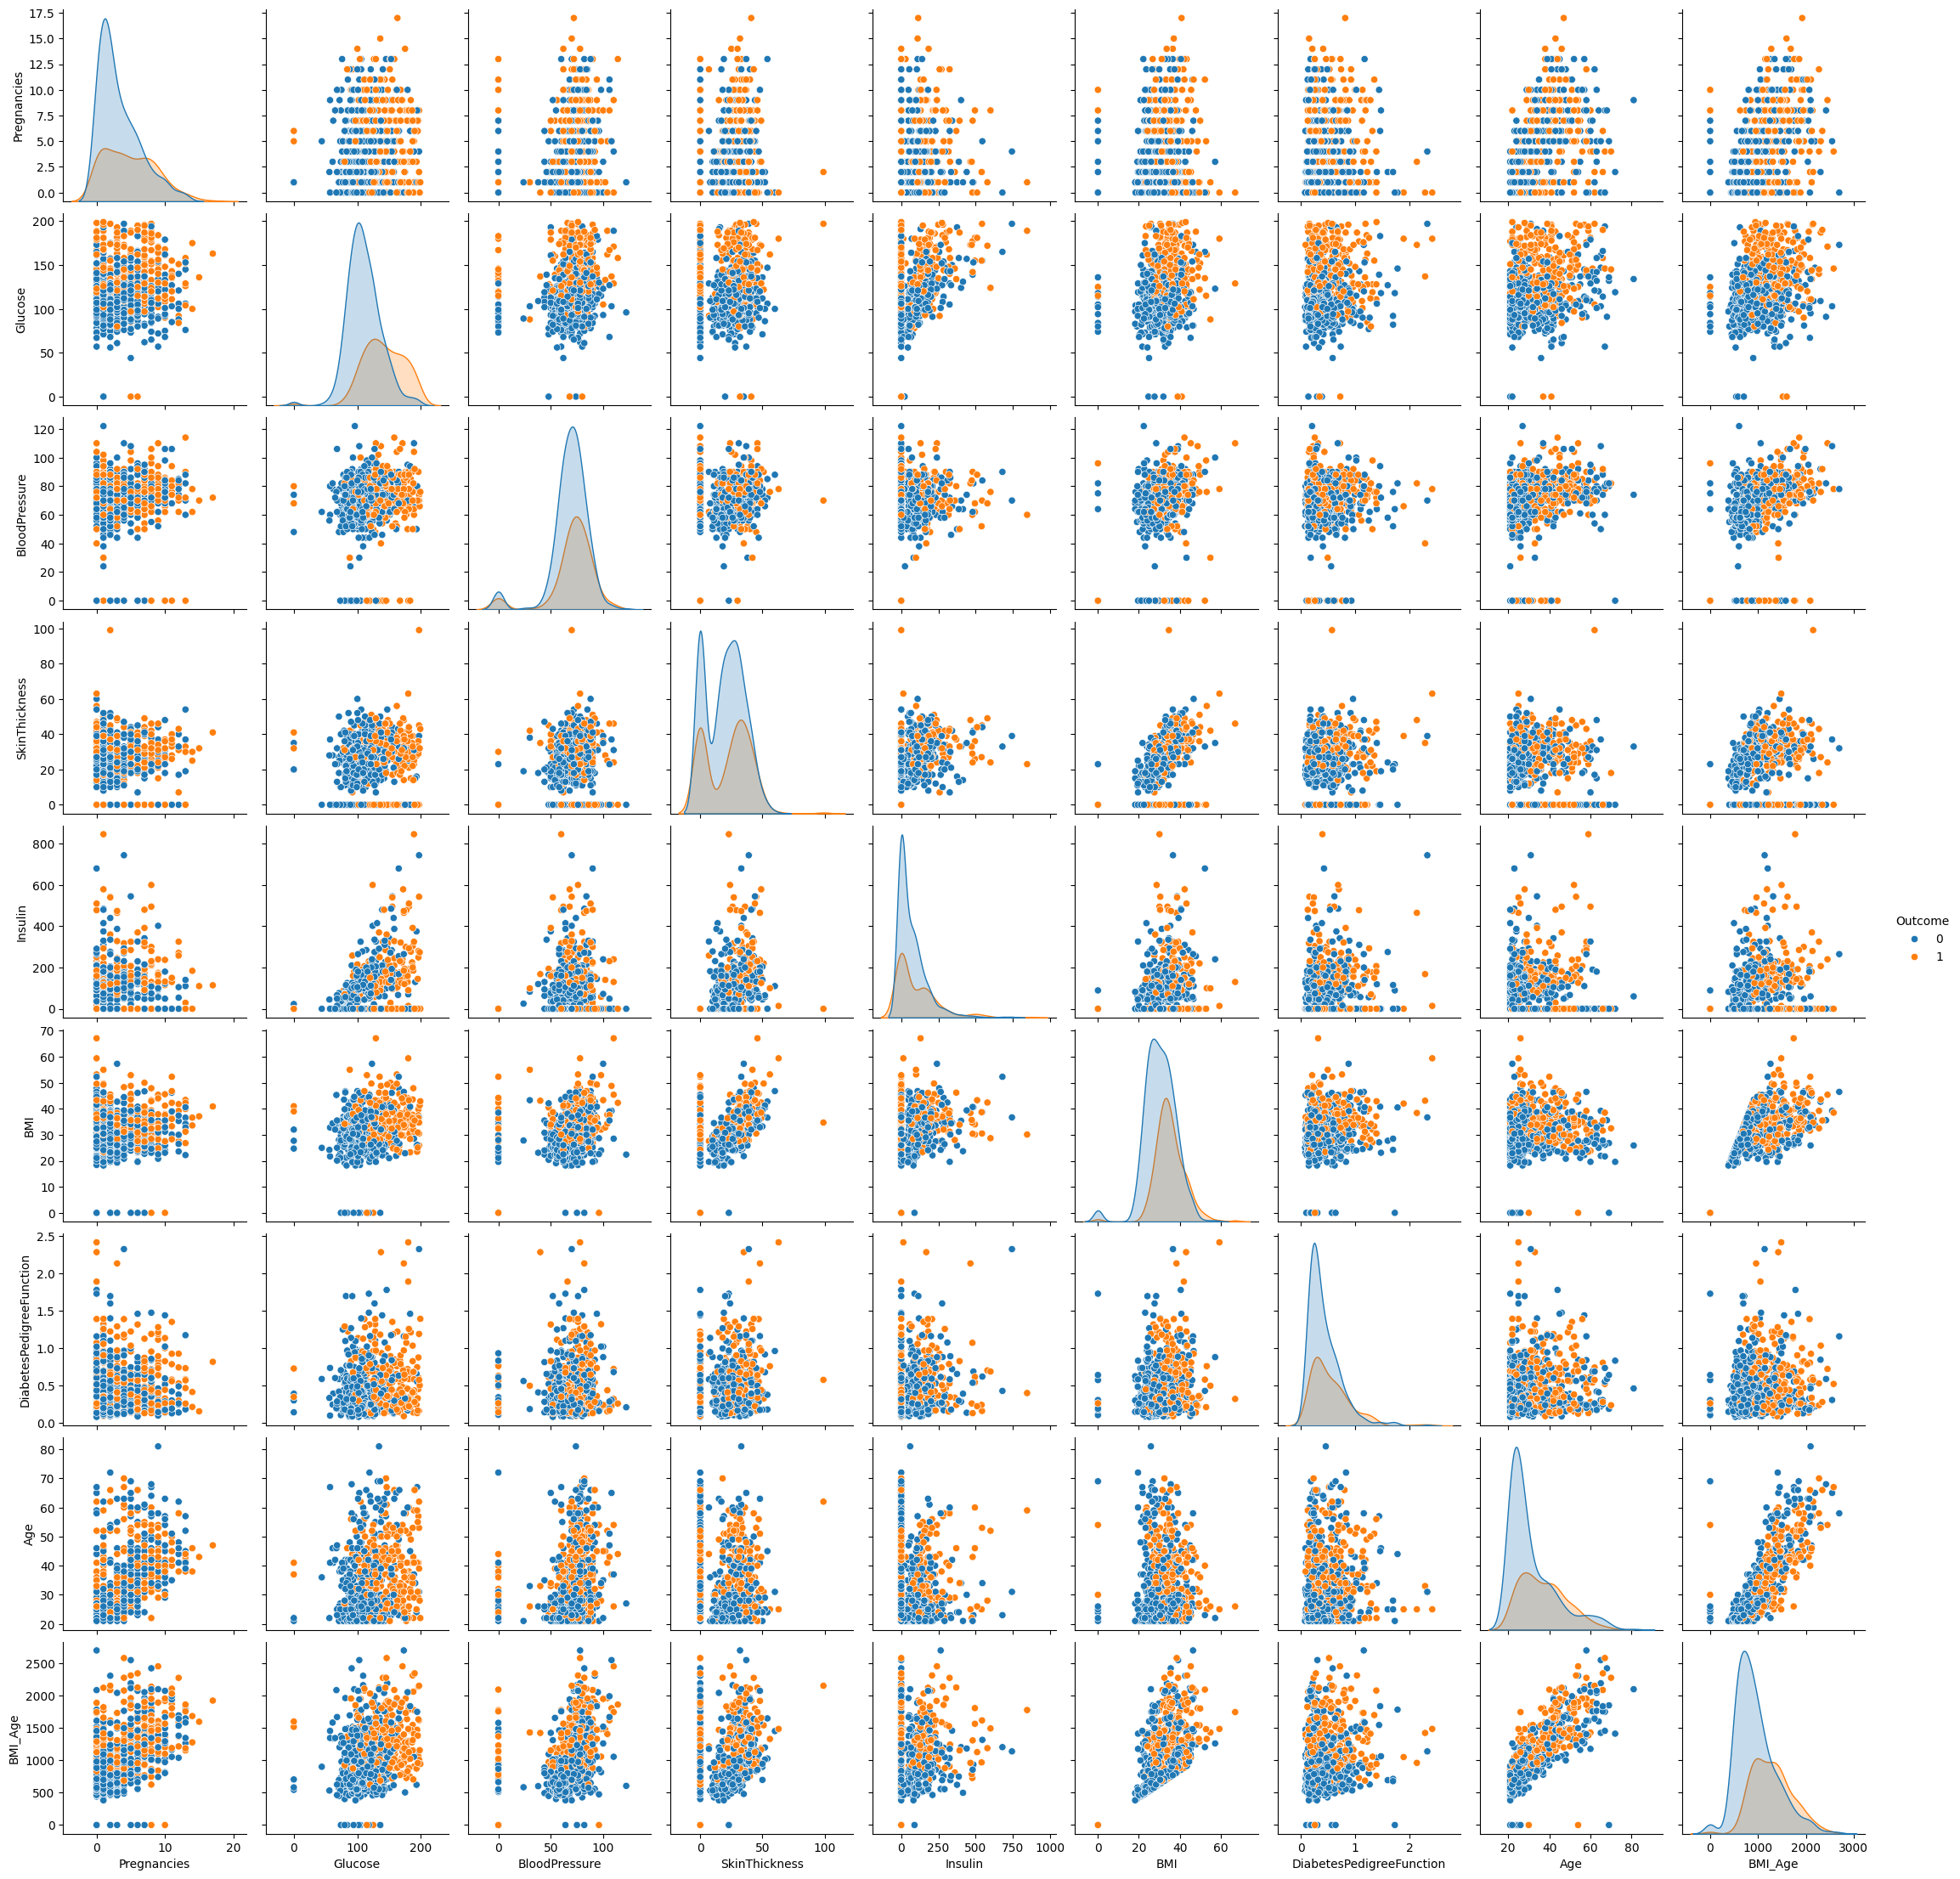

In [ ]:
sns.pairplot(df,hue="Outcome")

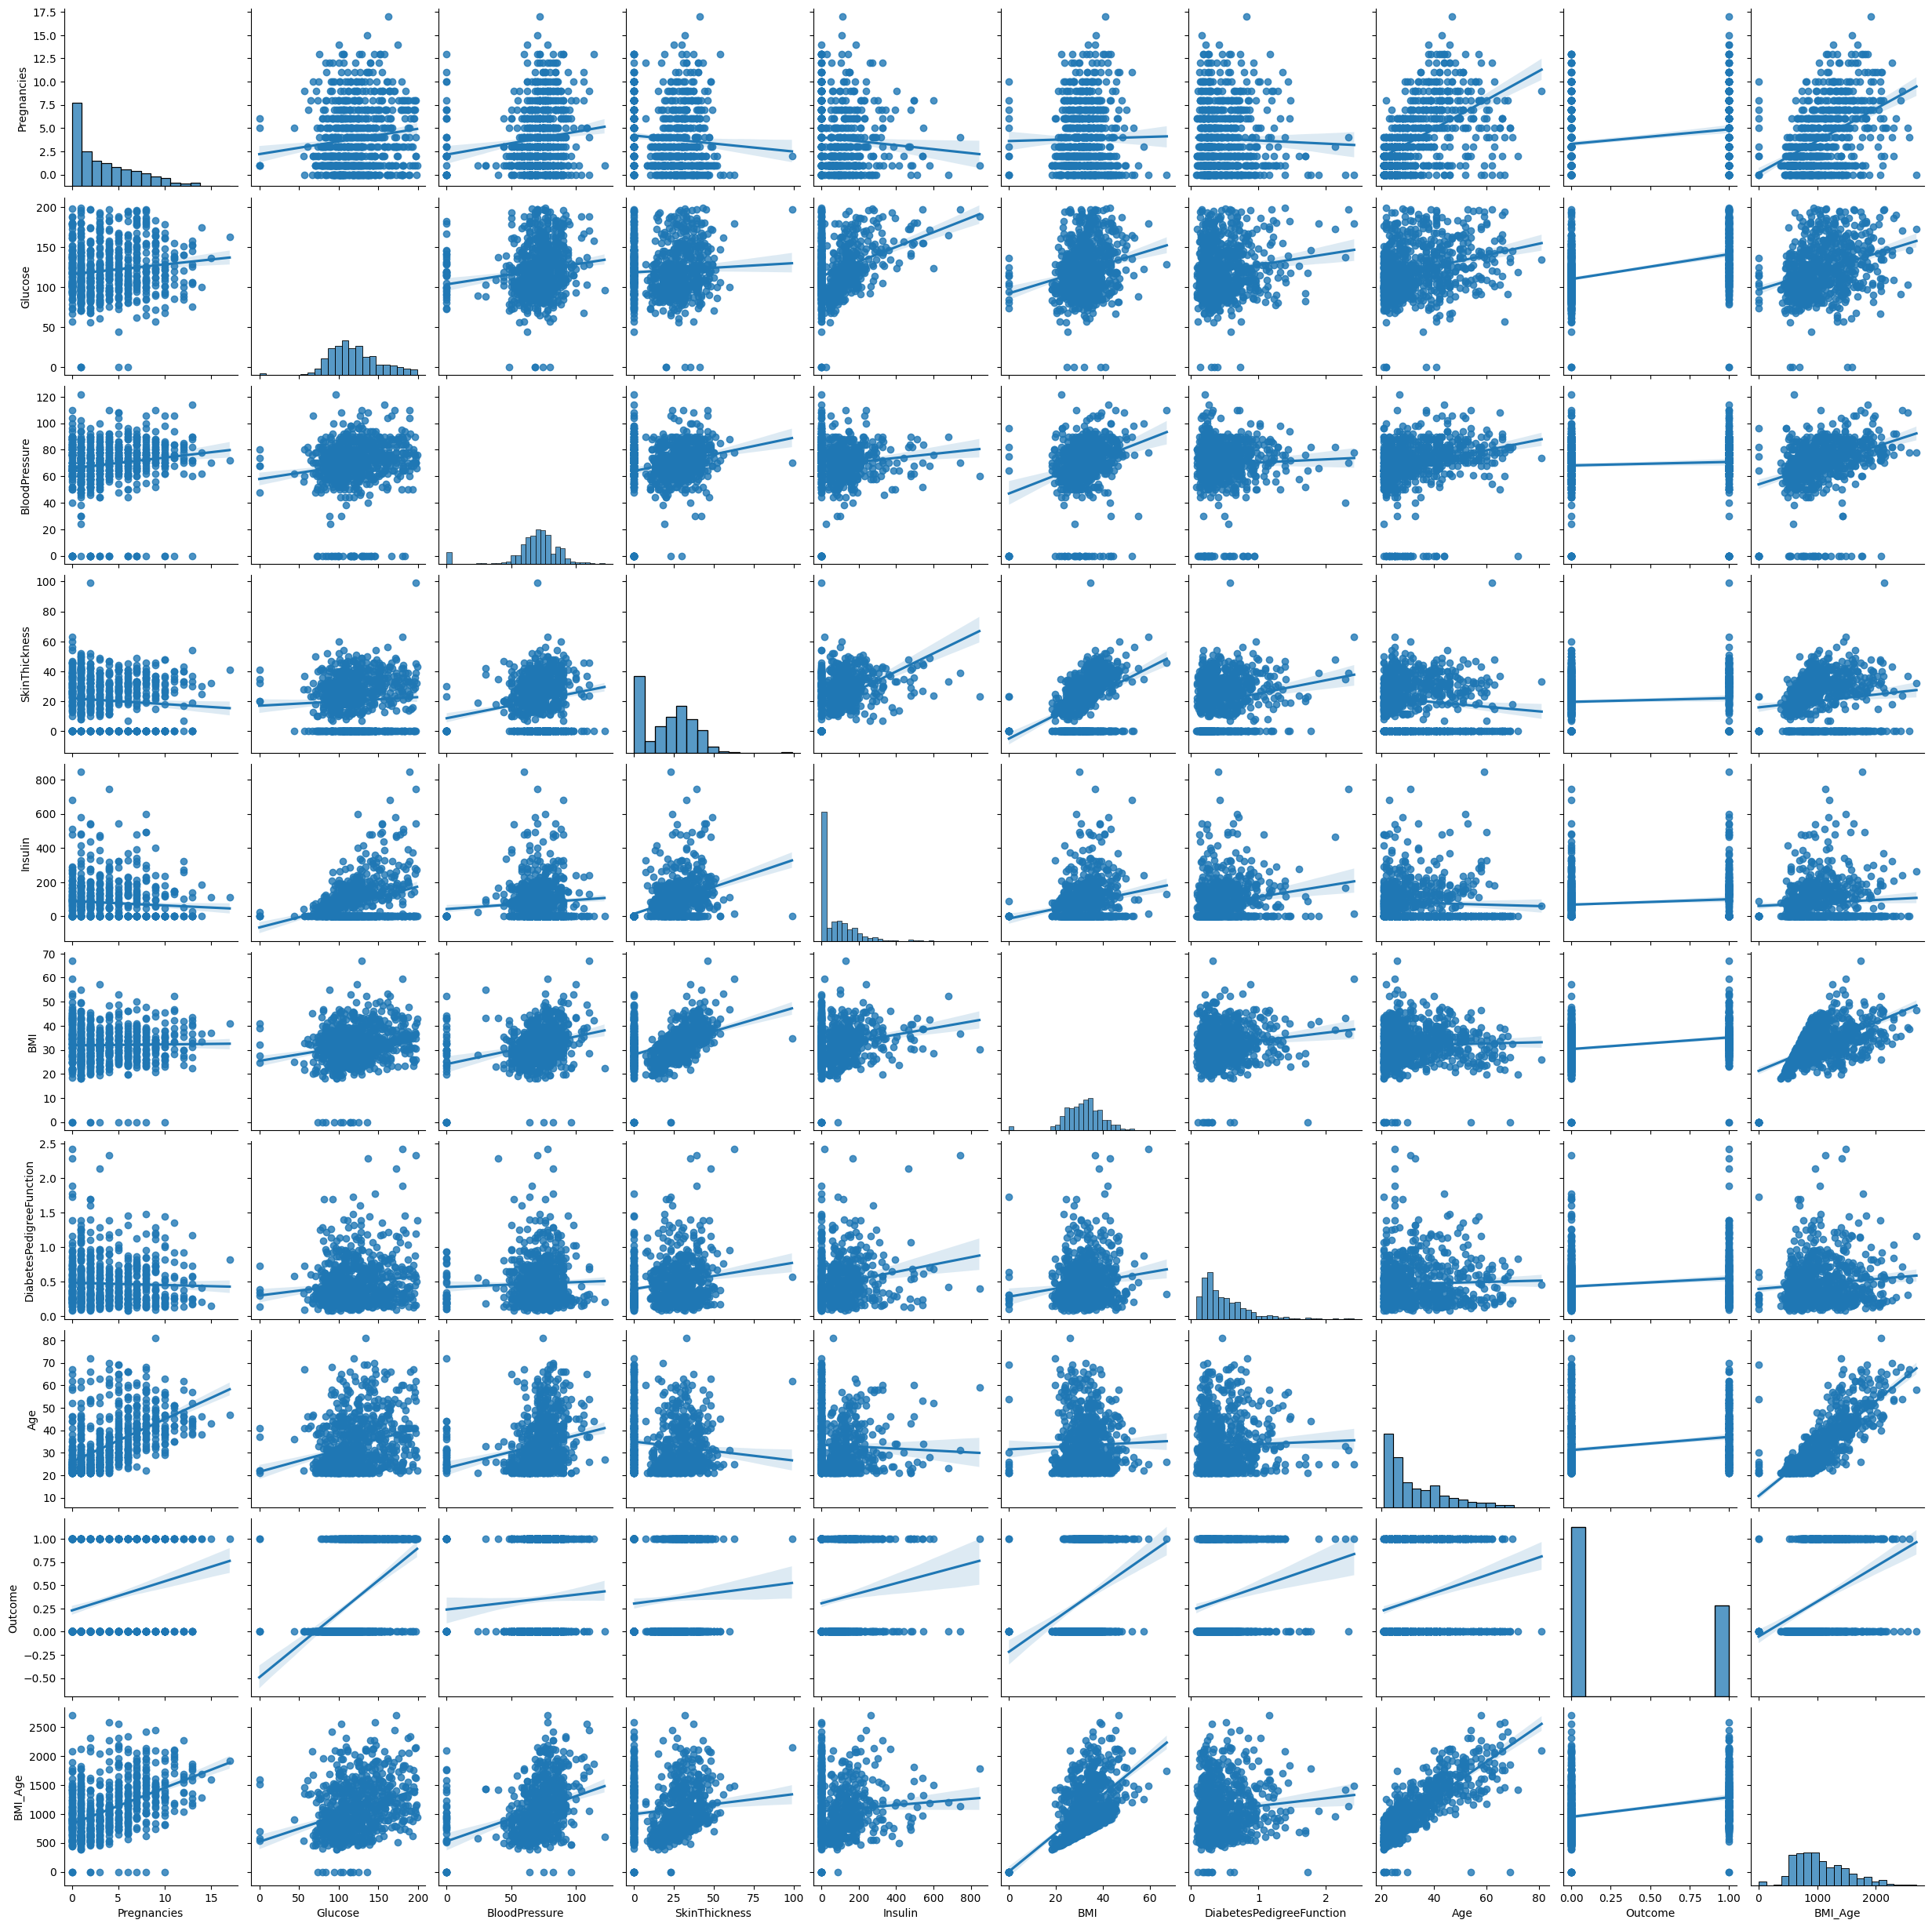

In [ ]:
sns.pairplot(df,kind ="reg") #Regresyon

<Axes: xlabel='Age', ylabel='Insulin'>

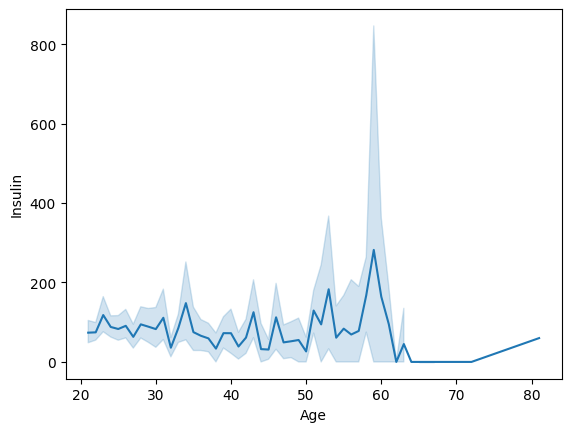

In [ ]:
sns.lineplot(x="Age",y="Insulin",data=df)

In [ ]:
import researchpy as rp
rp.summary_cont(df[["Insulin","BMI","Age"]]) #güven aralığı ortalama gibi değerlere ulaşılır.

Variable      N     Mean        SD      SE  95% Conf.  Interval
0  Insulin  768.0  79.7995  115.2440  4.1585    71.6361   87.9629
1      BMI  768.0  31.9926    7.8842  0.2845    31.4341   32.5511
2      Age  768.0  33.2409   11.7602  0.4244    32.4078   34.0739

<Axes: >

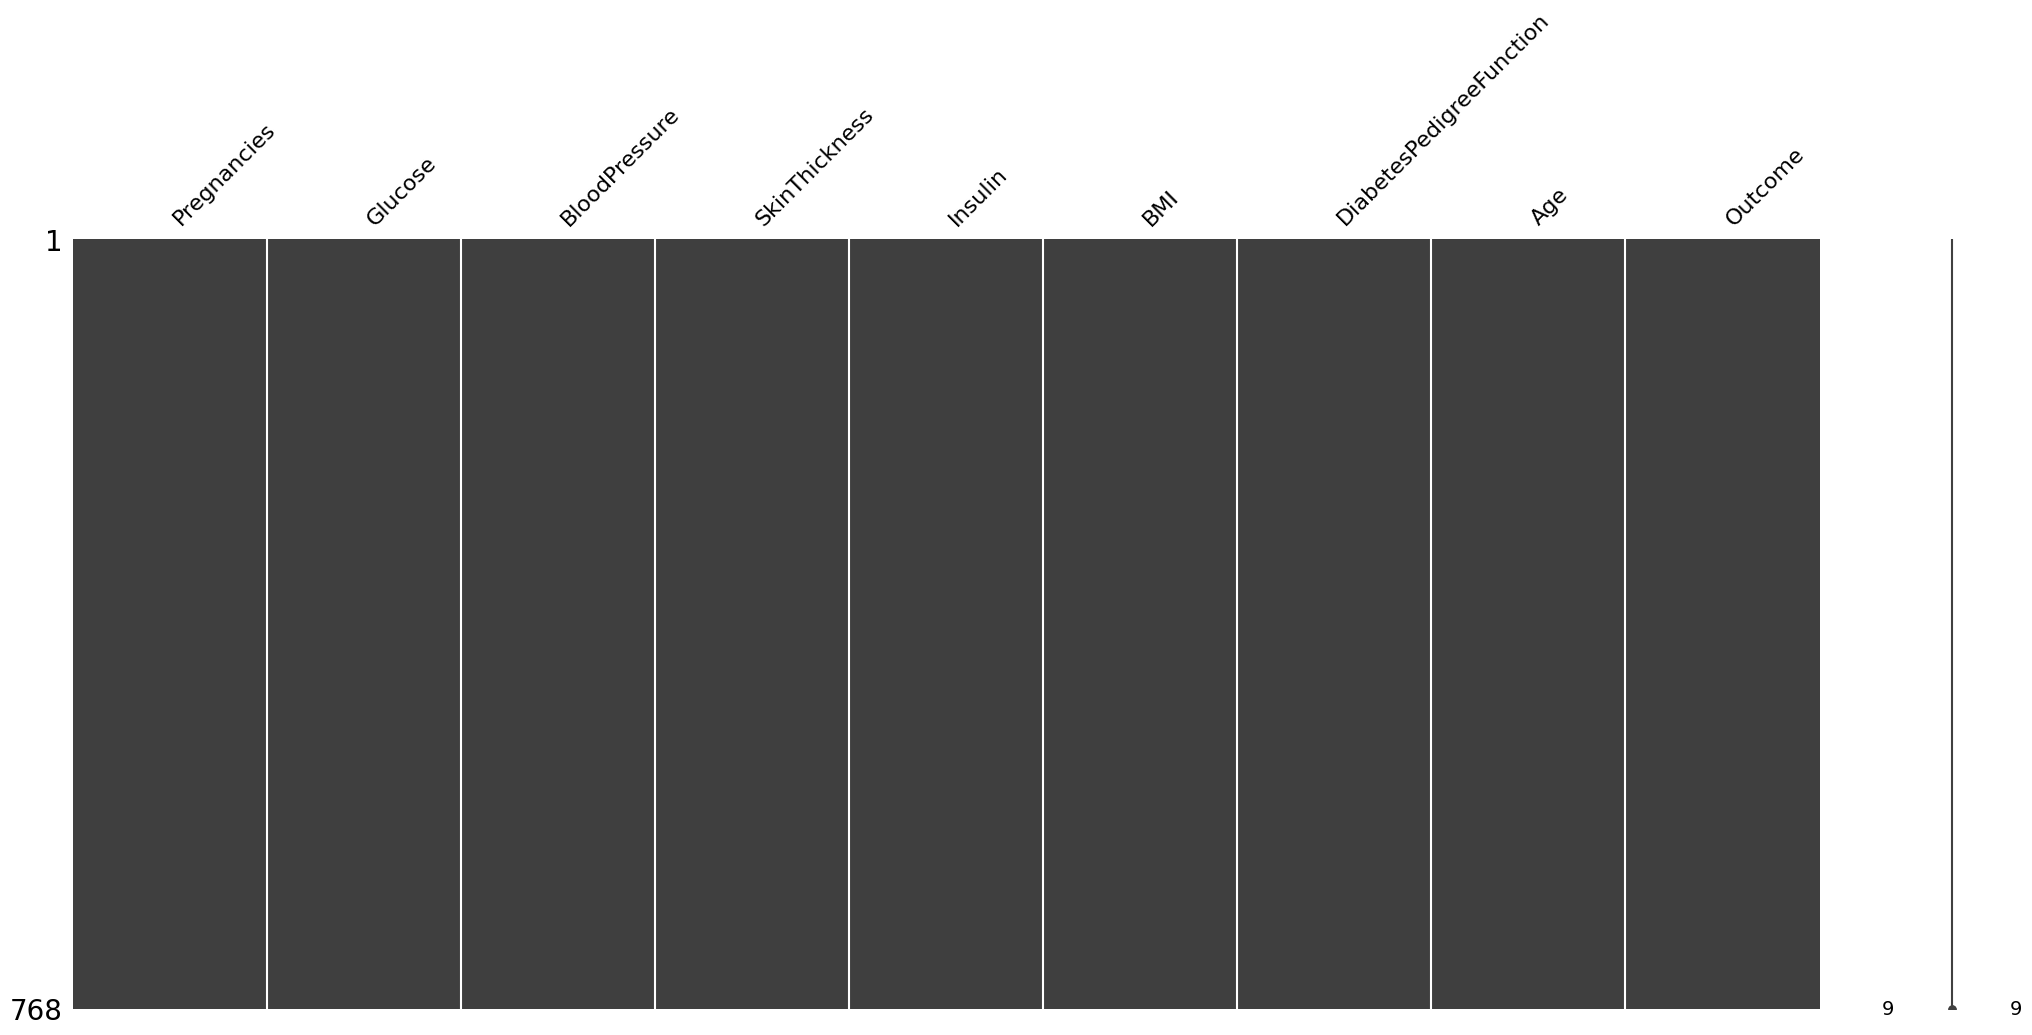

In [ ]:
import missingno as msno
msno.matrix(df)  #Normalde eksik değerlerin rassallığını yapısal mı değil mi bunu inceleriz ama eksik değerimiz yoktur.

In [ ]:
from sklearn import preprocessing

In [ ]:
preprocessing.scale(df) #Tüm değişkenler standarlaştırmış oldu tüm hepsi aynı oranda değiştiği için yapıları değişti bu işleme standardizasyon işlemi denilir.

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  1.94372388, -0.26394125, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [ ]:
preprocessing.normalize(df)#şimdi normalizasyon işlemine geçeceğiz 0 ile 1 arasına dönüştürmek için kullanılır

array([[0.03355185, 0.82761219, 0.40262215, ..., 0.00350617, 0.27959871,
        0.00559197],
       [0.008424  , 0.71604034, 0.55598426, ..., 0.00295683, 0.26114412,
        0.        ],
       [0.04039717, 0.9240852 , 0.32317734, ..., 0.00339336, 0.16158867,
        0.00504965],
       ...,
       [0.02691539, 0.65135243, 0.38758161, ..., 0.00131885, 0.16149234,
        0.        ],
       [0.00665291, 0.83826692, 0.39917472, ..., 0.00232187, 0.31268687,
        0.00665291],
       [0.00791454, 0.73605211, 0.55401772, ..., 0.00249308, 0.18203439,
        0.        ]])

In [ ]:
sclr=preprocessing.MinMaxScaler(feature_range=(10,20))#Kendi istediğimiz değerler arasında dönüştürme işlemi yapıldı
sclr.fit_transform(df)

array([[13.52941176, 17.43718593, 15.90163934, ..., 12.3441503 ,
        14.83333333, 20.        ],
       [10.58823529, 14.27135678, 15.40983607, ..., 11.16567037,
        11.66666667, 10.        ],
       [14.70588235, 19.1959799 , 15.24590164, ..., 12.53629377,
        11.83333333, 20.        ],
       ...,
       [12.94117647, 16.08040201, 15.90163934, ..., 10.71306576,
        11.5       , 10.        ],
       [10.58823529, 16.33165829, 14.91803279, ..., 11.15713066,
        14.33333333, 20.        ],
       [10.58823529, 14.67336683, 15.73770492, ..., 11.01195559,
        10.33333333, 10.        ]])

In [ ]:
df["BMI_Age"]=df["BMI"]*df["Age"]
df["Age_Category"]=pd.cut(df["Age"],bins=[0,20,40,60,np.inf],labels=["0-20","20-40","40-60","60+"])
df["Glucosse_Category"]=pd.cut(df["Glucose"],bins=[0,70,100,125,np.inf],labels=["Low","Normal","Pre-diabetic","Diabetic"])

In [ ]:
#bu yukarıda oluşturduğum yeni değişkenler 2 değişkeni bi arada göstermeye yardımcı olabilir mesela
#age category yaşın diyabet riski üzerindeki etkisini daha net bir şekilde analiz etmeye yardımcı olabilir...
df["Glucosse_Category"]

0          Diabetic
1            Normal
2          Diabetic
3            Normal
4          Diabetic
           ...     
763    Pre-diabetic
764    Pre-diabetic
765    Pre-diabetic
766        Diabetic
767          Normal
Name: Glucosse_Category, Length: 768, dtype: category
Categories (4, object): ['Low' < 'Normal' < 'Pre-diabetic' < 'Diabetic']

<Axes: ylabel='Outcome'>

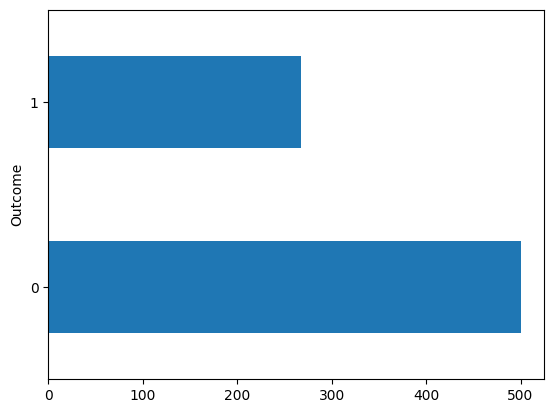

In [ ]:
df["Outcome"].value_counts().plot.barh() #şeker hastası olup olmaması sayısı

In [107]:
from sklearn.model_selection import train_test_split
X=df.drop(["Outcome"],axis=1) #Bağımsız değişkenimiz
y=df["Outcome"] #Bağımlı değişkenimiz

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)#Eğitim ve Test setleri oluşturuldu.

In [106]:
import pandas as pd

import statsmodels.api as sm
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [ ]:
loj = sm.Logit(y_train, X_train) #anlamlılığı r square değerlerini gösterir
loj_model = loj.fit()
print(loj_model.summary())

In [109]:
y_pred=loj.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [110]:
confusion_matrix(y_test,y_pred) #Karmaşıklık matrisi yani burada sınıflandırma işlemleri olur hastalık taşıyor mu taşımıyormu borcunu ödedi mi ödemedi mi  0 1
#gerçekte 1 iken 1 olan(122)  gerçekte 0 iken 1 denilenler (29)...

array([[126,  25],
       [ 32,  48]])

In [ ]:
accuracy_score(y_test,y_pred) #Doğru sınıflandırma oranımız yani ilkel skorumuz

0.7445887445887446

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred)) #f1 skorumuz  geri dönüş skoru doğru sınıflandırma oranı  ağırlık...

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.63      0.62      0.63        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [ ]:
mnist=tf.keras.datasets.mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [ ]:
X_train.shape,y_train.shape #Boyut olarak 28 28 olan 60000 tane eğitim seti var

((60000, 28, 28), (60000,))

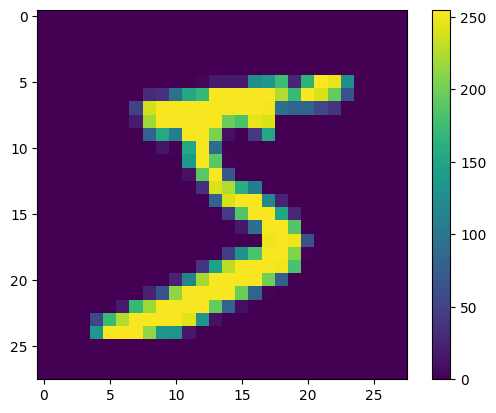

In [ ]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

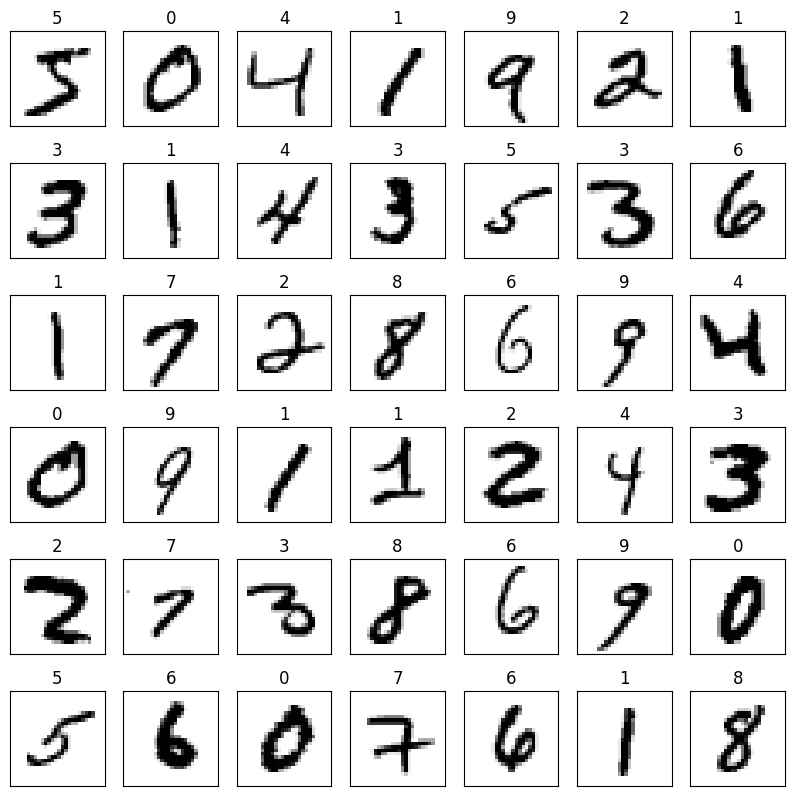

In [ ]:
plt.figure(figsize=(10,10))
for i in range(42):
  plt.subplot(6,7,i+1)
  plt.imshow(X_train[i],cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.title(y_train[i])
  plt.axis("on")

In [ ]:
# Verileri 28x28 görüntü formatından 784 özellikli vektörlere düzleştirelim yani farklı bir yapıya evriltiyoruz
X_train=X_train.reshape(X_train.shape[0] , -1)
X_test = X_test.reshape(X_test.shape[0], -1)
# ml de  modeller verileri tek boyutlu vektörler olarak alır. 28*28 boyutundaki görüntü 784 özellikli vektöre dönüştürülür. (28*28=784)

In [ ]:
X_train.shape,y_train.shape #X bağımsız y bağımlıdır

((60000, 784), (60000,))

In [143]:
loj=LogisticRegression(solver=("liblinear")) #model oluştu
loj_model=loj.fit(X_train,y_train)
y_pred=loj_model.predict(X_test)

In [144]:
loj_model.predict(X)[0:5] #ben sadece 0 ve 1 olasılıklarını isterim

array([1, 0, 1, 0, 1])

In [146]:
loj_model.predict_proba(X)[0:10][:,0:2] #baştaki sütun 0 sınıfına aittir   1 e ait sınıflar sağ taraftakiler
#mesela 2.si 1 olma olasılığı çok düşük 0.10 yani 0dır   3.sü mesela 1 olma olasılığı yüksek
#mesela 5. de tahmin edilen değerin 1 olması gerekin %74 oranı var ama gerçek değeri 0 çıkmış

array([[0.35055054, 0.64944946],
       [0.89718093, 0.10281907],
       [0.30658067, 0.69341933],
       [0.90430368, 0.09569632],
       [0.25000644, 0.74999356],
       [0.78643608, 0.21356392],
       [0.86363014, 0.13636986],
       [0.3115083 , 0.6884917 ],
       [0.22052657, 0.77947343],
       [0.91353935, 0.08646065]])

In [148]:
y[0:10] #gerçek değerler

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [150]:
loj_model.predict(X_test)[0:10] #tahmin edilen değerler mesela son 2 değeri doğru tahmin etmişiz

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [112]:
from sklearn.metrics import mean_squared_error,r2_score
knn_mdl=KNeighborsClassifier().fit(X_train,y_train)
y_pred = knn_mdl.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred)) #hata kareler ortalaması


0.5582905262390825

In [113]:
accuracy_score(y_test,y_pred)#Doğru sınıflandırma oranımız bu çıktı

0.6883116883116883

In [114]:
print(classification_report(y_test,y_pred)) #f1 skorumuz  geri dönüş skoru doğru sınıflandırma oranı  ağırlık

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



In [115]:
cm = confusion_matrix(y_test, y_pred) #karmaşıklık matrisimiz
cm

array([[114,  37],
       [ 35,  45]])

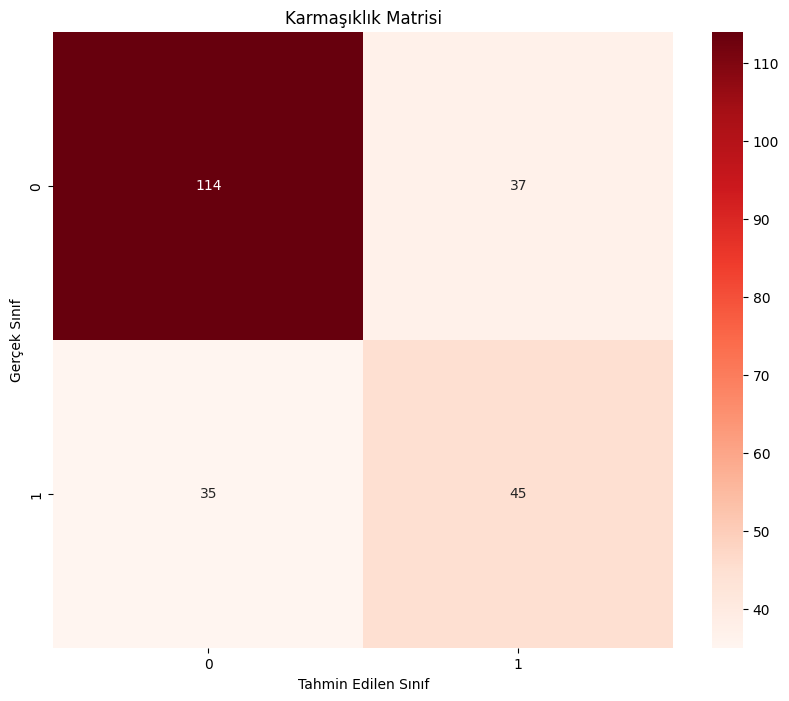

In [120]:
# görsel hali
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Reds", xticklabels=np.arange(2), yticklabels=np.arange(2))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

In [123]:
#Random Forest
rf=RandomForestClassifier().fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [124]:
accuracy_score(y_test,y_pred) #Doğru sınıflandırmamız yani ilkel skorumuz knn e göre daha fazla çıktı

0.7489177489177489

In [122]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [129]:
print(f'F1 Skoru: {f1_score(y_test,y_pred):.5f}')
print(f'Geri Çağırma Skoru (Recall): {recall_score(y_test,y_pred):.5f}')
print(f'Kesinlik Skoru (Precision): {precision_score(y_test,y_pred):.5f}')


F1 Skoru: 0.63750
Geri Çağırma Skoru (Recall): 0.63750
Kesinlik Skoru (Precision): 0.63750


In [159]:
#CART
cart_mdl=DecisionTreeRegressor(max_leaf_nodes=10,min_samples_split=10) #bu değiştikçe bölünmeler gerçekleşir
#mesela tahmini train yapıp max leafi kaldırıp min samplese 2 yapsam  mse o kadar düşüyor ki   2 yaptığımda artık
#giderek 2 tane iç içe if else komutu oluyor
cart_mdl.fit(X_train,y_train)
y_pred=cart_mdl.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))


0.4300620159564179

In [ ]:
params={"min_samples_split":range(2,100),
        "max_leaf_nodes":range(2,100)}

cart_mdl_for_cv = DecisionTreeRegressor()

cart_cv=GridSearchCV(cart_mdl_for_cv, params, cv=10).fit(X_train,y_train).best_params_ #en iyi değerleri çıktı gösterip yerleştirecez

In [ ]:
#best paramsta  min samples  max leaf değerlerini 76 ve 9 verdi onları yerleştiriyoruz
cart_tune=DecisionTreeRegressor(max_leaf_nodes=9,min_samples_split=76).fit(X_train,y_train)

In [142]:
y_pred=cart_mdl.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred)) #tahmin edilen hata değişti

array([[0.35055054, 0.64944946],
       [0.89718093, 0.10281907],
       [0.30658067, 0.69341933],
       [0.90430368, 0.09569632],
       [0.25000644, 0.74999356],
       [0.78643608, 0.21356392],
       [0.86363014, 0.13636986],
       [0.3115083 , 0.6884917 ],
       [0.22052657, 0.77947343],
       [0.91353935, 0.08646065]])

In [162]:
bag_mdl=BaggingRegressor(bootstrap_features=True)#boots. örenkelrini gözlemlek için
bag_mdl.fit(X_train,y_train)#n_estimores =10  10 tane eleman oluşacak   estimators_   ile bunlara ulaşırız
#estimators_feaatures_  bağımsız değişkenlerine ulaşırz
#bu topluluğun hepsi bir araya getirerek oluşturduğu tahminlerdi   ama şimdi bir kaç ağaca tek te
#k gidip sen ne diyosun ben senin fikrini diğer ağaca sen ne diyosun tek tek bilgilerini almak isteriz


BaggingRegressor(bootstrap_features=True)

In [163]:
y_pred=bag_mdl.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.4520276588097285

In [ ]:
bag_params={"estimator_":range(2,20)}
bag_cv=GridSearchCV(bag_mdl,bag_params,cv=10).fit(X_train,y_train).best_params_

In [ ]:
#şimdi tune haliyle  çıkan en uygun parametreyi tekrar yazdıracaz  14 çıktı
bag_tune=BaggingRegressor(n_estimators=14 ,random_state=45)
bag_tune.fit(X_test)

y_pred=bag_mdl.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred)) #tahmin edilen hata azaldı

In [168]:
#Destek vektör regresyon
svr_mdl=SVR(kernel="linear").fit(X_train,y_train)
svr_pred=svr_mdl.predict(X_train)#train için tahmşb deperller oluştuk çıkan tahmin değer 403
svr_mdl.intercept_ #bu değer -48 çıkar  (sabit değer )
svr_mdl.coef_ # katsayı  bu değer 4.96 çıkar (b1 katsayısı) ,


array([[ 0.00435924,  0.00810019, -0.001795  , -0.00143541, -0.00013237,
         0.0131511 ,  0.10652001,  0.00710543]])

In [170]:
y_pred=svr_mdl.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

0.42856035736522935


In [ ]:
mnist=tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
#Buraya kadar neredeyse tüm regresyonlar modeller oluşturuldu veri işleme yapıldı veri görselleştirme yapıldı Standardizasyon Normalizasyon işlemleri yapıldı Korelasyonlar karmaşıklık matrisleri oluşturuldu devamını yetiştiremedim
#MERİÇ ŞİMŞEK mericsimsek344@gmail.com

In [171]:
#cnn
from tensorflow.keras.layers import Conv2D, Dense, Flatten, \
                                    Concatenate, GlobalMaxPooling2D, \
                                    MaxPooling2D, GlobalAveragePooling2D, \
                                    AveragePooling2D,Dropout

In [173]:
model=tf.keras.Sequential([
    tf.keras.layers.InputLayer((28,28,1)),
    tf.keras.layers.Rescaling(1/255.0),

    Conv2D(6,2,activation="relu"),
    MaxPooling2D((2,2)), # Havuzlama boyutu (2,2) olarak küçülttük
    Conv2D(12,4,activation="relu"),
    MaxPooling2D((2,2)), # Havuzlama boyutu (2,2) olarak küçültüük
    Conv2D(24,6,activation="relu"),
    # Son MaxPooling2D katmanı kaldırıldı
    Flatten(),

    Dense(10,activation="softmax")
])


model.summary()

ValueError: Exception encountered when calling layer "conv2d_5" (type Conv2D).

Negative dimension size caused by subtracting 6 from 5 for '{{node conv2d_5/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_5/Conv2D/ReadVariableOp)' with input shapes: [?,5,5,12], [6,6,12,24].

Call arguments received by layer "conv2d_5" (type Conv2D):
  • inputs=tf.Tensor(shape=(None, 5, 5, 12), dtype=float32)